In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('strong_scaling_results.txt', sep=' ', header=None)

In [3]:
df.columns = ['time', 'nworkers', 'blocksize', 'N', 'scheduling']


In [4]:
# drop blocksize column
df.drop('blocksize', axis=1, inplace=True)

In [5]:
# group by nworkers and scheduling  
grouped = df.groupby(['nworkers', 'scheduling'])

In [6]:
# delete max and min values for each group
df = grouped.apply(lambda x: x[(x['time'] != x['time'].max()) & (x['time'] != x['time'].min())])

In [7]:
# reset index
df = df.reset_index(drop=True)

In [8]:
df 

,time,nworkers,N,scheduling
0,1.177610,1,2048,0
1,1.179480,1,2048,0
2,1.178420,1,2048,0
3,1.180040,1,2048,0
4,1.181510,1,2048,0
...,...,...,...,...
235,0.171905,36,2048,1
236,0.175535,36,2048,1
237,0.176745,36,2048,1
238,0.170601,36,2048,1


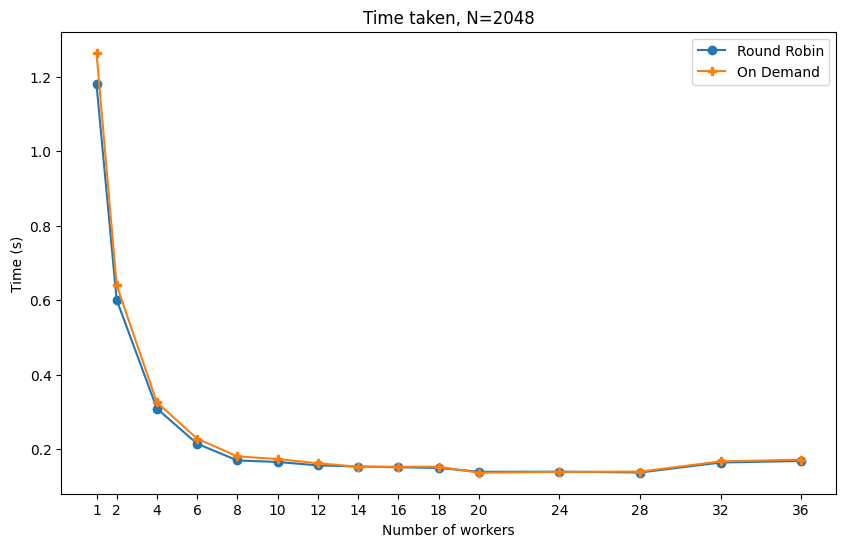

In [16]:
# group by nworkers and scheduling again, mean values and plot
grouped = df.groupby(['nworkers', 'scheduling']).mean()
grouped = grouped.reset_index()

df_rr = grouped[grouped['scheduling'] == 0]
df_on_demand = grouped[grouped['scheduling'] == 1]

plt.figure(figsize=(10, 6))
plt.plot(df_rr['nworkers'], df_rr['time'], label='Round Robin', marker='o')
plt.plot(df_on_demand['nworkers'], df_on_demand['time'], label='On Demand', marker='P')
plt.xticks(df_rr['nworkers'])
plt.xlabel('Number of workers')
plt.ylabel('Time (s)')
plt.title('Time taken, N=2048')
plt.legend()
plt.savefig('images/strong_scaling.png')
plt.show()



In [10]:
df_rr['speedup'] = df_rr['time'].iloc[0] / df_rr['time']
df_on_demand['speedup'] = df_on_demand['time'].iloc[0] / df_on_demand['time']
df_rr['efficiency'] = df_rr['speedup'] / df_rr['nworkers']
df_on_demand['efficiency'] = df_on_demand['speedup'] / df_on_demand['nworkers']

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_12984\3002163701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rr['speedup'] = df_rr['time'].iloc[0] / df_rr['time']
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_12984\3002163701.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_on_demand['speedup'] = df_on_demand['time'].iloc[0] / df_on_demand['time']
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_12984\3002163701.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

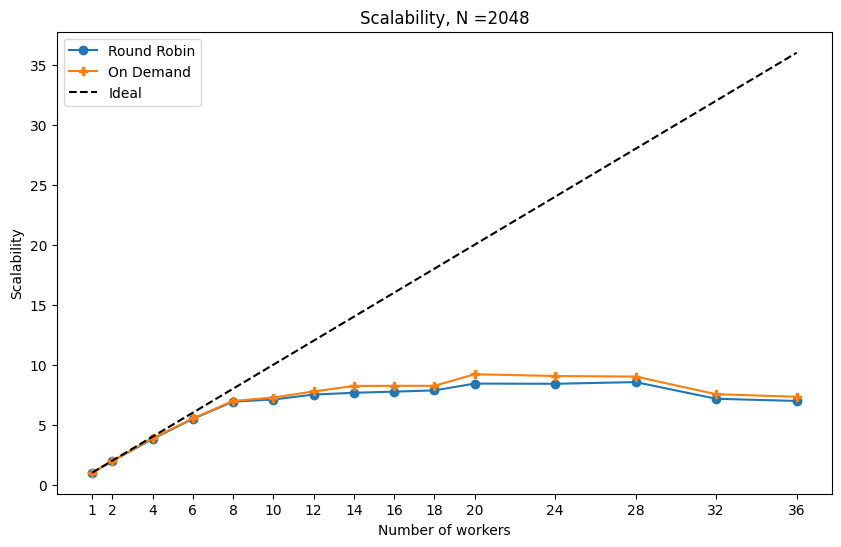

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(df_rr['nworkers'], df_rr['speedup'], label='Round Robin', marker='o')
plt.plot(df_on_demand['nworkers'], df_on_demand['speedup'], label='On Demand', marker='P')
plt.plot(df_rr['nworkers'], df_rr['nworkers'], label='Ideal', linestyle='--', color='black' )
plt.xticks(df_rr['nworkers'])
plt.xlabel('Number of workers')
plt.ylabel('Scalability')
plt.title('Scalability, N =2048')
plt.legend()
plt.savefig('images/strong_scaling_speedup.png')
plt.show()


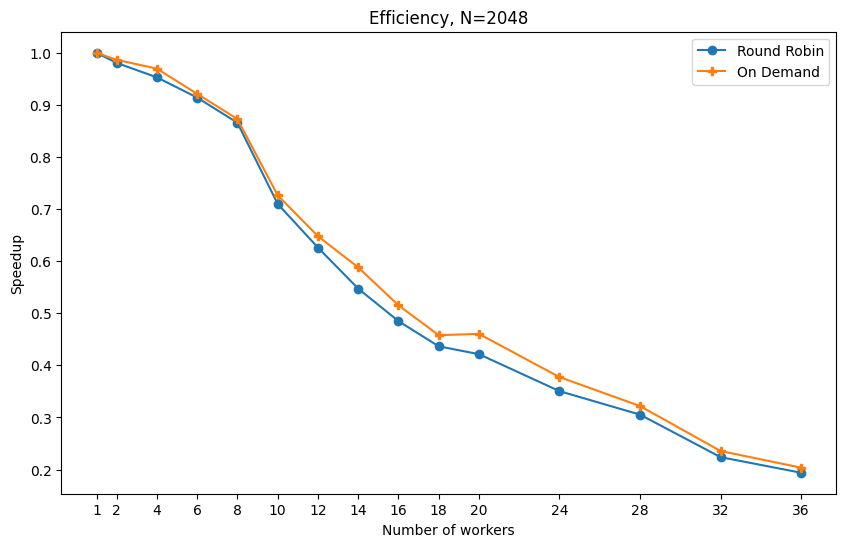

In [12]:

plt.figure(figsize=(10, 6))
plt.plot(df_rr['nworkers'], df_rr['efficiency'], label='Round Robin', marker='o')
plt.plot(df_on_demand['nworkers'], df_on_demand['efficiency'], label='On Demand', marker='P')
plt.xticks(df_rr['nworkers'])
plt.xlabel('Number of workers')
plt.ylabel('Speedup')
plt.title('Efficiency, N=2048')
plt.legend()
plt.savefig('images/strong_scaling_eff.png')
plt.show()


In [13]:
# table
print(df_rr)
print(df_on_demand)
# table to latex


    nworkers  scheduling      time       N   speedup  efficiency
0          1           0  1.179633  2048.0  1.000000    1.000000
2          2           0  0.601603  2048.0  1.960815    0.980408
4          4           0  0.309536  2048.0  3.810976    0.952744
6          6           0  0.215119  2048.0  5.483628    0.913938
8          8           0  0.170359  2048.0  6.924407    0.865551
10        10           0  0.166175  2048.0  7.098736    0.709874
12        12           0  0.157026  2048.0  7.512333    0.626028
14        14           0  0.153972  2048.0  7.661344    0.547239
16        16           0  0.152054  2048.0  7.757984    0.484874
18        18           0  0.150124  2048.0  7.857701    0.436539
20        20           0  0.139964  2048.0  8.428121    0.421406
22        24           0  0.140237  2048.0  8.411729    0.350489
24        28           0  0.137944  2048.0  8.551509    0.305411
26        32           0  0.164689  2048.0  7.162800    0.223837
28        36           0 

In [15]:
df_rr_latex = df_rr.to_latex(index=False)
df_on_demand_latex = df_on_demand.to_latex(index=False)

with open('tables/strong_scaling_rr.tex', 'w') as f:
    f.write(df_rr_latex)

with open('tables/strong_scaling_on_demand.tex', 'w') as f:
    f.write(df_on_demand_latex)

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_12984\3975656144.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_rr_latex = df_rr.to_latex(index=False)
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_12984\3975656144.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_on_demand_latex = df_on_demand.to_latex(index=False)


# Weak Scaling


In [75]:
df = pd.read_csv('weak_scaling.txt', sep=' ', header=None)
df_par = pd.read_csv('weak_scaling_par.txt', sep=' ', header=None)

In [76]:
df.head()
df.columns = ['N', 'time']

In [77]:
df_par.head()
df_par.columns = ['time', 'nworkers', 'blocksize', 'N', 'scheduling']   


In [78]:
# group by nworkers, drop blocksize column, delete max and min values for each group
grouped = df_par.groupby(['nworkers'])
df_par = grouped.apply(lambda x: x[(x['time'] != x['time'].max()) & (x['time'] != x['time'].min())])
df_par = df_par.reset_index(drop=True)

grouped = df.groupby(['N'])
df = grouped.apply(lambda x: x[(x['time'] != x['time'].max()) & (x['time'] != x['time'].min())])
df = df.reset_index(drop=True)





In [79]:
df_par = df_par.groupby(['nworkers']).mean()
df = df.groupby(['N']).mean()
df, df_par

(          time
 N             
 1290  0.291456
 1625  0.560968
 1860  0.823432
 2047  1.124796
 2206  1.473150
 2344  1.852933
 2580  2.704827
 2779  3.680669,
               time  blocksize       N  scheduling
 nworkers                                         
 2         0.164958        8.0  1290.0         0.0
 4         0.160366        8.0  1625.0         0.0
 6         0.164267        8.0  1860.0         0.0
 8         0.179595        8.0  2047.0         0.0
 10        0.258455        8.0  2206.0         0.0
 12        0.316812        8.0  2344.0         0.0
 16        0.469682        8.0  2580.0         0.0
 20        0.677372        8.0  2779.0         0.0)

<Axes: xlabel='N', ylabel='time'>

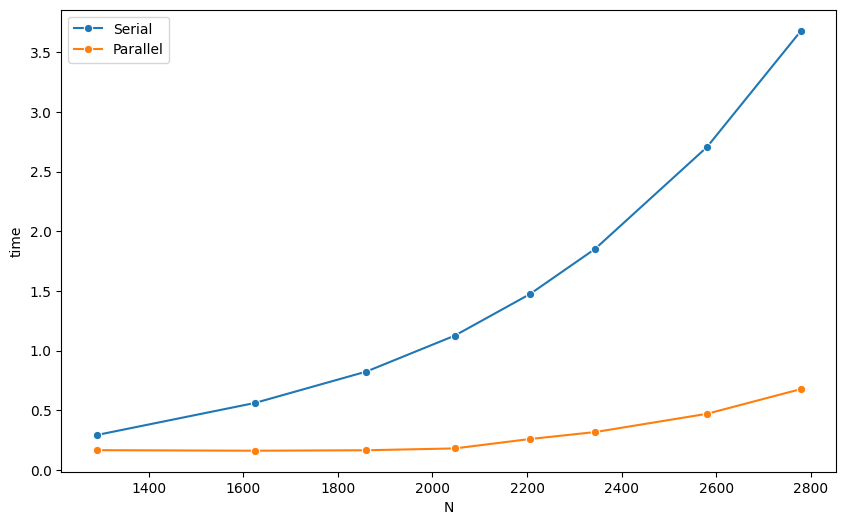

In [80]:
# plot time taken wrt N
plt.figure(figsize=(10, 6))
sns.lineplot(x=df.index, y=df['time'], label='Serial', marker='o')
sns.lineplot(x=df_par.N, y=df_par['time'], label='Parallel', marker='o')

In [89]:
# compute speedup as time taken by serial / time taken by parallel
speedup = df['time'].reset_index(drop=True) / df_par['time'].reset_index(drop=True)
# give index to speedup
speedup.index = df_par.index

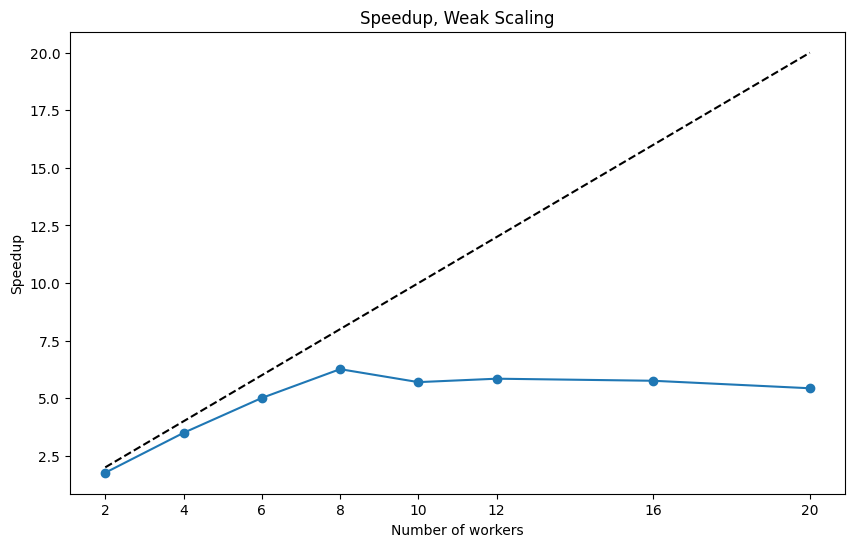

In [93]:
plt.figure(figsize=(10, 6))
plt.plot(speedup.index, speedup, marker='o')
plt.plot (speedup.index, speedup.index, linestyle='--', color='black')
plt.xticks(speedup.index)
plt.xlabel('Number of workers')
plt.ylabel('Speedup')
plt.title('Speedup, Weak Scaling')
plt.savefig('images/weak_scaling_speedup.png')
plt.show()
